# Part B - Data Analytics

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel(r'C:\Users\riche\Desktop\CX BA I Take Home - Ship Data - Take Home - Ship Data.xlsx')

In [3]:
df.head(10)

,name,sex,age,class,went_excursion,sibling_spouse,parent_child
0,"Allen, Miss. Elisabeth Walton",female,29.0000,1,1,0,0
1,"Allison, Master. Hudson Trevor",male,0.9167,1,1,1,2
2,"Allison, Miss. Helen Loraine",female,2.0000,1,0,1,2
3,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,0,1,2
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",male,25.0000,1,0,1,2
5,"Anderson, Mr. Harry",male,48.0000,1,1,0,0
6,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,1,1,0
7,"Andrews, Mr. Thomas Jr",male,39.0000,1,0,0,0
8,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,1,1,2,0
9,"Artagaveytia, Mr. Ramon",male,71.0000,1,0,0,0


In [11]:
df_female = df[df['sex'] == "female"]
df_female['sex'].count()

465

In [22]:
(df['sex'] == 'female').sum()

465

### Part B Question 1) What is the median age of the women who went on excursions?

In [36]:
df.groupby(['sex', 'went_excursion'])['age'].median()

sex     went_excursion
female  0                 24.0
        1                 28.5
male    0                 29.0
        1                 27.0
Name: age, dtype: float64

**Cell above shows the median age of women who went on excursions = 28.5 years old (sex = female & went_excursion = 1).**

### Part B Question 2) Add a column which denotes whether the names have a double letter in them. Possible can be “true” and “false”

In [37]:
name = df['name']

In [38]:
# Removing titles so that they do not affect the search for double letters next to each other.
import re
remove = ['Mr', 'Miss', 'Mrs', 'Master', 'Mme']
name_clean = []
for row in df['name']:
    row = re.sub("[^0-9a-zA-Z]+", '', row)
    for title in remove:
        if title in row:
            row = row.replace(title, '')
    name_clean.append(row)
name_clean

['AllenElisabethWalton',
 'AllisonHudsonTrevor',
 'AllisonHelenLoraine',
 'AllisonHudsonJoshuaCreighton',
 'AllisonsHudsonJCBessieWaldoDaniels',
 'AndersonHarry',
 'AndrewsKorneliaTheodosia',
 'AndrewsThomasJr',
 'AppletonsEdwardDaleCharlotteLamson',
 'ArtagaveytiaRamon',
 'AstorColJohnJacob',
 'AstorsJohnJacobMadeleineTalmadgeForce',
 'AubartLeontinePauline',
 'BarberEllenNellie',
 'BarkworthAlgernonHenryWilson',
 'BaumannJohnD',
 'BaxterQuiggEdmond',
 'BaxtersJamesHeleneDeLaudeniereChaput',
 'BazzaniAlbina',
 'BeattieThomson',
 'BeckwithRichardLeonard',
 'BeckwithsRichardLeonardSallieMonypeny',
 'BehrKarlHowell',
 'BidoisRosalie',
 'BirdEllen',
 'BirnbaumJakob',
 'BishopDickinsonH',
 'BishopsDickinsonHHelenWalton',
 'BissetteAmelia',
 'BjornstromSteffanssonMauritzHakan',
 'BlackwellStephenWeart',
 'BlankHenry',
 'BonnellCaroline',
 'BonnellElizabeth',
 'BorebankJohnJames',
 'BowenGraceScott',
 'BowermanElsieEdith',
 'BradleyGeorgeGeorgeArthurBrayton',
 'BradyJohnBertram',
 'BrandeisE

In [39]:
# Finding double letters next to each other for each name.

Duplicates = []
for i in name_clean:
    a = [match[0] for match in re.findall(r'((\w)\2)', i)]
    if len(a) > 0:
        Duplicates.append("True")
    else:
        Duplicates.append("False")
print(Duplicates)

['True', 'True', 'True', 'True', 'True', 'True', 'False', 'False', 'True', 'False', 'False', 'False', 'False', 'True', 'False', 'True', 'True', 'False', 'True', 'True', 'False', 'True', 'True', 'False', 'True', 'False', 'False', 'True', 'True', 'True', 'True', 'False', 'True', 'True', 'False', 'True', 'False', 'False', 'False', 'False', 'False', 'False', 'True', 'True', 'False', 'True', 'False', 'True', 'True', 'False', 'True', 'True', 'True', 'True', 'True', 'False', 'True', 'True', 'False', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'False', 'True', 'False', 'True', 'False', 'True', 'True', 'False', 'True', 'True', 'True', 'False', 'True', 'True', 'False', 'True', 'True', 'True', 'False', 'True', 'False', 'True', 'False', 'False', 'False', 'False', 'True', 'False', 'False', 'False', 'False', 'True', 'True', 'True', 'True', 'True', 'True', 'False', 'True', 'False', 'False', 'True', 'False', 'True', 'True', 'False', 'False', 'False', 'False', 'False', 'False', 'True', 'Fal

In [40]:
# Adding new column titled Duplicates that has True and False values if the names have double letters.
df['Duplicates'] = Duplicates
df

,name,sex,age,class,went_excursion,sibling_spouse,parent_child,Duplicates
0,"Allen, Miss. Elisabeth Walton",female,29.0000,1,1,0,0,True
1,"Allison, Master. Hudson Trevor",male,0.9167,1,1,1,2,True
2,"Allison, Miss. Helen Loraine",female,2.0000,1,0,1,2,True
3,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,0,1,2,True
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",male,25.0000,1,0,1,2,True
...,...,...,...,...,...,...,...,...
1304,"Zabour, Miss. Hileni",female,14.5000,3,0,1,0,False
1305,"Zabour, Miss. Thamine",female,NaN,3,0,1,0,False
1306,"Zakarian, Mr. Mapriededer",male,26.5000,3,0,0,0,False
1307,"Zakarian, Mr. Ortin",male,27.0000,3,0,0,0,False


In [41]:
# Exporting updated dataframe to a new excel sheet.
pd.DataFrame.to_excel(df, r'C:\Users\riche\Desktop\CX BA I Take Home - Ship Data - Take Home - Ship Data Found Duplicates.xlsx', index=False)

### Part B Question 3) What is the breakdown of titles (For simplicity, just Mme, Miss, Master, Mrs)?

In [42]:
# Finding count of when Mme occurs in the name column.
Mme_Title = []
for i in name:
    regex = re.compile(r'Mme+')
    if regex.findall(i):
        Mme_Title.append("Found Mme")
    else:
        Mme_Title.append("No Mme")
    Mme_Title_Count = Mme_Title.count("Found Mme")
print(Mme_Title_Count) 

1


***Above shows Mme occured 1 time.***

In [43]:
# Finding count of when Miss occurs in the name column.
Miss_Title = []
for i in name:
    regex = re.compile(r'Miss+')
    if regex.findall(i):
        Miss_Title.append("Found Miss")
    else:
        Miss_Title.append("No Miss")
    Miss_Title_Count = Miss_Title.count("Found Miss")
print(Miss_Title_Count)

260


***Above shows Miss occured 260 times.***

In [44]:
# Finding count of when Master occurs in the name column.
Master_Title = []
for i in name:
    regex = re.compile(r'Master+')
    if regex.findall(i):
        Master_Title.append("Found Master")
    else:
        Master_Title.append("No Master")
    Master_Title_Count = Master_Title.count("Found Master")
print(Master_Title_Count) 

61


***Above shows Master occured 61 times.***

In [45]:
# Finding count of when Mrs occurs in the name column.
Mrs_Title = []
for i in name:
    regex = re.compile(r'Mrs+')
    if regex.findall(i):
        Mrs_Title.append("Found Mrs")
    else:
        Mrs_Title.append("No Mrs")
    Mrs_Title_Count = Mrs_Title.count("Found Mrs")
print(Mrs_Title_Count)

201


***Above shows Mrs occured 201 times.***

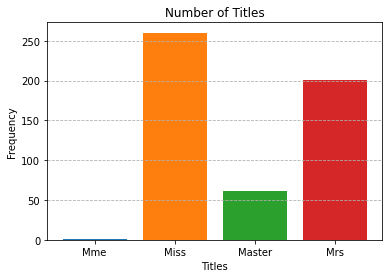

In [46]:
X = ['Mme', 'Miss', 'Master', 'Mrs']
Y = [Mme_Title_Count, Miss_Title_Count, Master_Title_Count, Mrs_Title_Count]

plt.title('Number of Titles')
plt.xlabel("Titles")
plt.ylabel("Frequency")
plt.bar(X, Y, color = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red'])
plt.grid(axis = 'y', linestyle = '--')

*** Mme = 1, Miss = 260, Master = 61, Mrs = 201 ***